In [ ]:
import scanpy as sc

In [ ]:
adata = sc.read_h5ad("/scratch/user/s4735100/public.h5ad")
adata.var_names = adata.var_names.astype(str)
adata.var_names_make_unique()
adata

In [ ]:
adata.var

In [ ]:
adata_discovery = sc.read_h5ad("/scratch/user/s4735100/Discovery_cohort.h5ad")
adata_discovery

In [ ]:
adata.var['gene_symbols'] = adata_discovery.var['gene_symbols']

In [ ]:
adata.var

In [ ]:
adata.var.index.name = 'gene_id'
adata.var["gene_symbols"] = adata.var["gene_symbols"].astype(str)
adata.var.reset_index(drop=False, inplace=True)
adata.var.set_index("gene_symbols", inplace=True, drop=True)
adata.var_names_make_unique()

In [ ]:
adata.var

In [ ]:
adata.var.index.duplicated().any()

In [ ]:
if adata.raw is not None:
    print("Raw counts are present in the AnnData object.")
else:
    print("Raw counts are not present in the AnnData object.")

In [ ]:
adata.raw = adata 

In [1]:
import scanpy as sc
master_copy = '/scratch/user/s4735100/mastercopy.h5ad'
#adata.write(master_copy)

In [2]:
adata = sc.read(master_copy)

/home/s4735100/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
adata

AnnData object with n_obs × n_vars = 123322 × 33538
    obs: 'sanger_sample_id', 'disease_status', 'biopsy_type', 'age', 'sex', 'inflammation_status', 'smoking_status', 'bead_version', 'bead_lot', 'chip_version', 'chip_lot', 'lane', 'enzyme_lot_blp', 'gem_lot', 'f1_f2_ratio', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'normalization_factor', 'pct_counts_gene_group__mito_transcript', 'cell_passes_qc', 'scrublet__multiplet_scores', 'scrublet__predicted_multiplet', 'predicted_celltype_probability', 'major_cell_type', 'predicted_celltype', 'label__machine', 'category__machine', 'medication_class', 'disease_status__machine'
    var: 'gene_id'
    layers: 'counts', 'log1p_cp10k'

In [4]:
adata.var

gene_id
gene_symbols                 
MIR1302-2HG   ENSG00000243485
FAM138A       ENSG00000237613
OR4F5         ENSG00000186092
AL627309.1    ENSG00000238009
AL627309.3    ENSG00000239945
...                       ...
AC233755.2    ENSG00000277856
AC233755.1    ENSG00000275063
AC240274.1    ENSG00000271254
AC213203.1    ENSG00000277475
FAM231C       ENSG00000268674

[33538 rows x 1 columns]

In [5]:
if adata.raw is not None:
    print("Raw counts are present in the AnnData object.")
else:
    print("Raw counts are not present in the AnnData object.")

Raw counts are present in the AnnData object.


In [6]:
adata_processed = adata.copy()

/home/s4735100/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [7]:
adata_processed.var

gene_id
gene_symbols                 
MIR1302-2HG   ENSG00000243485
FAM138A       ENSG00000237613
OR4F5         ENSG00000186092
AL627309.1    ENSG00000238009
AL627309.3    ENSG00000239945
...                       ...
AC233755.2    ENSG00000277856
AC233755.1    ENSG00000275063
AC240274.1    ENSG00000271254
AC213203.1    ENSG00000277475
FAM231C       ENSG00000268674

[33538 rows x 1 columns]

In [8]:
sc.tl.pca(adata_processed)
sc.pp.neighbors(adata_processed, n_pcs=30, n_neighbors=20)
sc.tl.umap(adata_processed, min_dist=0.3)

/home/s4735100/mambaforge/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/s4735100/mambaforge/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/s4735100/mambaforge/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDepr

In [9]:
sc.tl.leiden(adata_processed)

/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


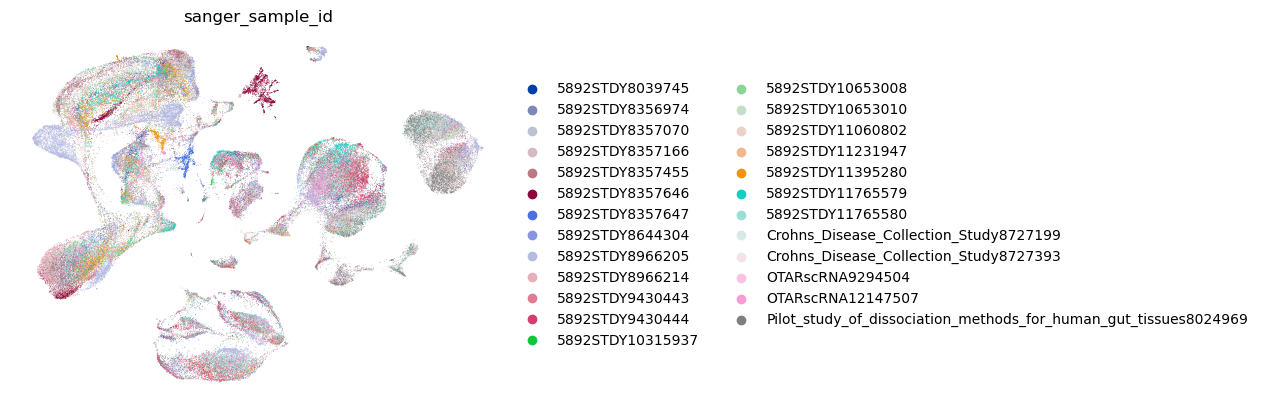

In [10]:
sc.pl.umap(
    adata_processed,
    color=["sanger_sample_id"],
    frameon=False,
)

/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


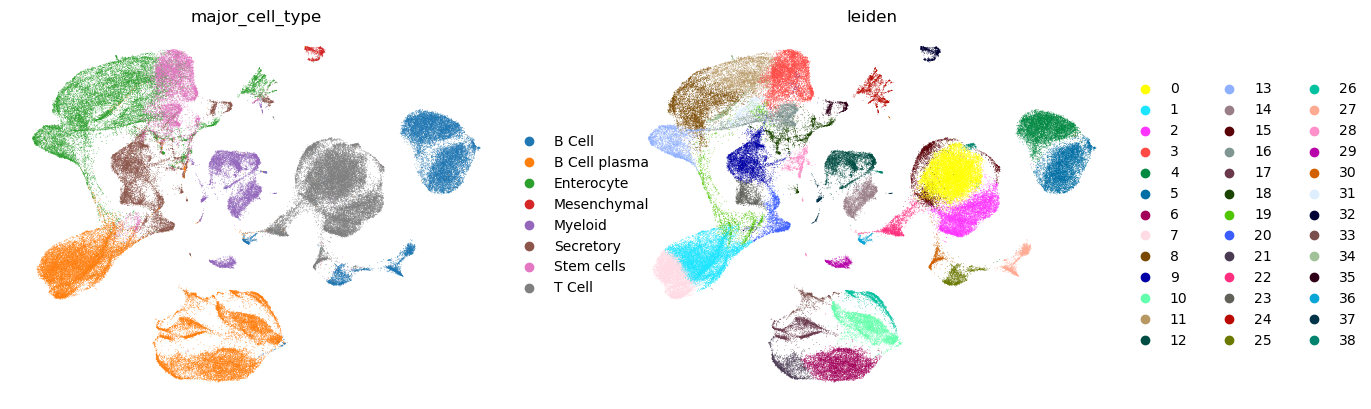

In [11]:
sc.pl.umap(
    adata_processed,
    color=["major_cell_type", "leiden"],
    frameon=False,
)

In [12]:
adata_processed.raw.to_adata()

/home/s4735100/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 123322 × 33538
    obs: 'sanger_sample_id', 'disease_status', 'biopsy_type', 'age', 'sex', 'inflammation_status', 'smoking_status', 'bead_version', 'bead_lot', 'chip_version', 'chip_lot', 'lane', 'enzyme_lot_blp', 'gem_lot', 'f1_f2_ratio', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'normalization_factor', 'pct_counts_gene_group__mito_transcript', 'cell_passes_qc', 'scrublet__multiplet_scores', 'scrublet__predicted_multiplet', 'predicted_celltype_probability', 'major_cell_type', 'predicted_celltype', 'label__machine', 'category__machine', 'medication_class', 'disease_status__machine', 'leiden'
    var: 'gene_id'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'sanger_sample_id_colors', 'major_cell_type_colors', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [13]:
sc.pp.highly_variable_genes(adata_processed, subset = True)

/home/s4735100/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [14]:
adata_processed

AnnData object with n_obs × n_vars = 123322 × 2381
    obs: 'sanger_sample_id', 'disease_status', 'biopsy_type', 'age', 'sex', 'inflammation_status', 'smoking_status', 'bead_version', 'bead_lot', 'chip_version', 'chip_lot', 'lane', 'enzyme_lot_blp', 'gem_lot', 'f1_f2_ratio', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'normalization_factor', 'pct_counts_gene_group__mito_transcript', 'cell_passes_qc', 'scrublet__multiplet_scores', 'scrublet__predicted_multiplet', 'predicted_celltype_probability', 'major_cell_type', 'predicted_celltype', 'label__machine', 'category__machine', 'medication_class', 'disease_status__machine', 'leiden'
    var: 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'sanger_sample_id_colors', 'major_cell_type_colors', 'leiden_colors', 'hvg'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'log1p_cp10k'
    obsp: 'distances', 'connectivities'

In [15]:
sc.external.pp.harmony_integrate(adata_processed, key="sanger_sample_id", basis='X_pca', adjusted_basis='X_pca_harmony', )

2024-04-26 13:53:24,381 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-04-26 13:53:45,368 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-04-26 13:53:45,754 - harmonypy - INFO - Iteration 1 of 10
2024-04-26 13:54:26,555 - harmonypy - INFO - Iteration 2 of 10
2024-04-26 13:55:05,744 - harmonypy - INFO - Iteration 3 of 10
2024-04-26 13:55:44,602 - harmonypy - INFO - Iteration 4 of 10
2024-04-26 13:56:23,887 - harmonypy - INFO - Iteration 5 of 10
2024-04-26 13:57:08,216 - harmonypy - INFO - Iteration 6 of 10
2024-04-26 13:57:55,115 - harmonypy - INFO - Iteration 7 of 10
2024-04-26 13:58:41,792 - harmonypy - INFO - Iteration 8 of 10
2024-04-26 13:59:28,796 - harmonypy - INFO - Iteration 9 of 10
2024-04-26 14:00:07,650 - harmonypy - INFO - Iteration 10 of 10
2024-04-26 14:00:33,076 - harmonypy - INFO - Stopped before convergence


In [16]:
sc.pp.neighbors(adata_processed, use_rep="X_pca_harmony")
sc.tl.umap(adata_processed, min_dist=0.3)
sc.tl.leiden(adata_processed, key_added = "harmony_leiden")

/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


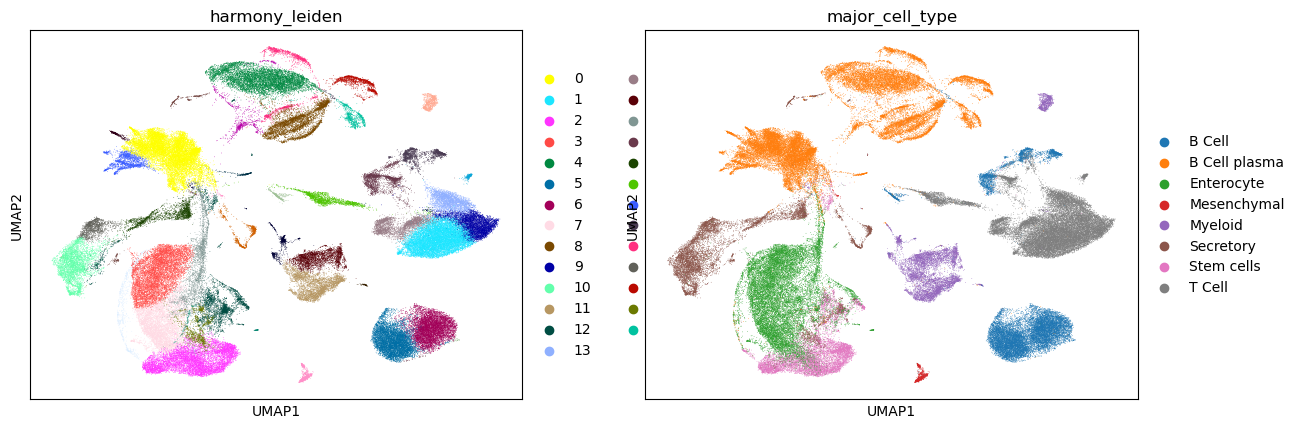

In [17]:
sc.pl.umap(adata_processed, color=["harmony_leiden", "major_cell_type"])

/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


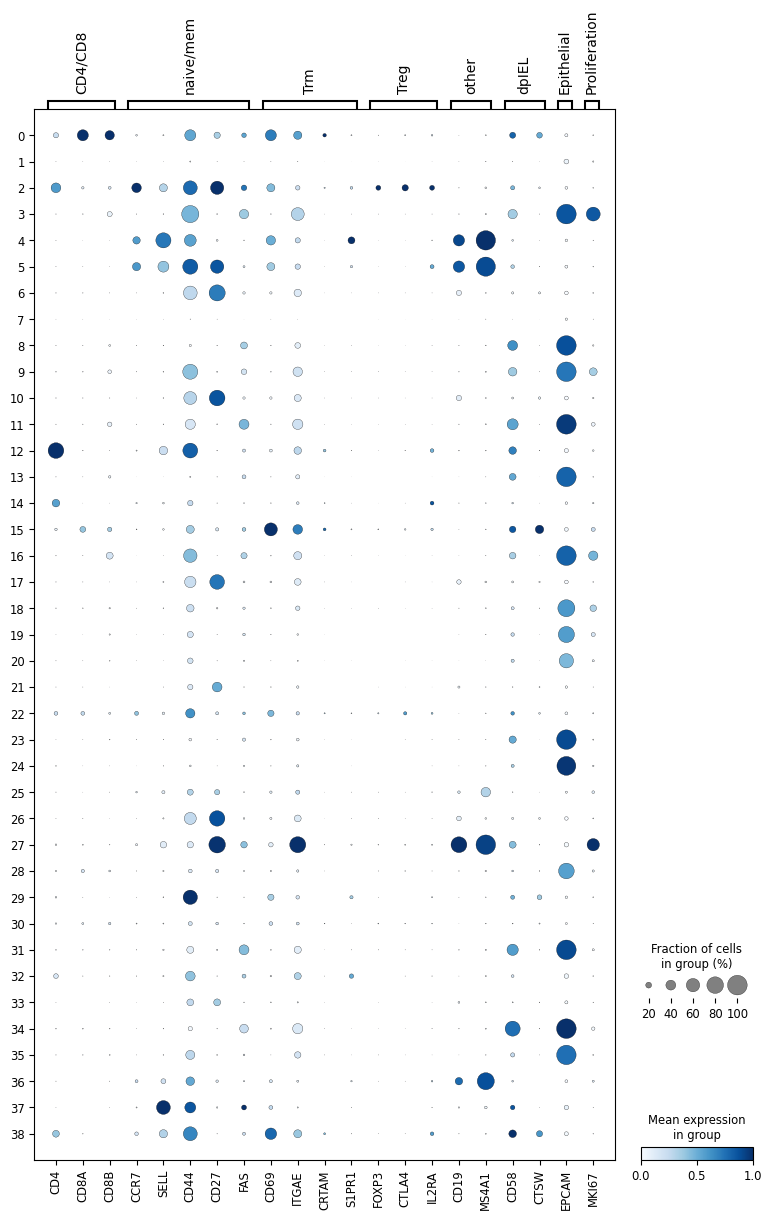

In [19]:
sc.pl.dotplot(
    adata_processed,
    markers,
    groupby="leiden",
    standard_scale="var",
    cmap="Blues",
    dendrogram=False,
)

In [20]:
# Transfer .obs and .obsm to Raw
adata.obs = adata_processed.obs
adata.obsm = adata_processed.obsm

# Save the modified original AnnData object
#adata.write("/scratch/user/s4735100/crohns_disease_harmony.h5ad")

In [21]:
adata = sc.read_h5ad("/scratch/user/s4735100/crohns_disease_harmony.h5ad")

/home/s4735100/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [22]:
if adata.raw is not None:
    print("Raw counts are present in the AnnData object.")
else:
    print("Raw counts are not present in the AnnData object.")

Raw counts are present in the AnnData object.


In [23]:
adata

AnnData object with n_obs × n_vars = 123322 × 33538
    obs: 'sanger_sample_id', 'disease_status', 'biopsy_type', 'age', 'sex', 'inflammation_status', 'smoking_status', 'bead_version', 'bead_lot', 'chip_version', 'chip_lot', 'lane', 'enzyme_lot_blp', 'gem_lot', 'f1_f2_ratio', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'normalization_factor', 'pct_counts_gene_group__mito_transcript', 'cell_passes_qc', 'scrublet__multiplet_scores', 'scrublet__predicted_multiplet', 'predicted_celltype_probability', 'major_cell_type', 'predicted_celltype', 'label__machine', 'category__machine', 'medication_class', 'disease_status__machine', 'leiden', 'harmony_leiden'
    var: 'gene_id'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    layers: 'counts', 'log1p_cp10k'

In [24]:
adata_tcell = adata[adata.obs["major_cell_type"] == "T Cell"].copy()
adata_tcell

AnnData object with n_obs × n_vars = 25389 × 33538
    obs: 'sanger_sample_id', 'disease_status', 'biopsy_type', 'age', 'sex', 'inflammation_status', 'smoking_status', 'bead_version', 'bead_lot', 'chip_version', 'chip_lot', 'lane', 'enzyme_lot_blp', 'gem_lot', 'f1_f2_ratio', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'normalization_factor', 'pct_counts_gene_group__mito_transcript', 'cell_passes_qc', 'scrublet__multiplet_scores', 'scrublet__predicted_multiplet', 'predicted_celltype_probability', 'major_cell_type', 'predicted_celltype', 'label__machine', 'category__machine', 'medication_class', 'disease_status__machine', 'leiden', 'harmony_leiden'
    var: 'gene_id'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    layers: 'counts', 'log1p_cp10k'

In [ ]:
#adata_tcell.var_names = adata_tcell.var_names.astype(str)
#adata_tcell.var_names_make_unique()

In [26]:
duplicated_indices = adata_tcell.var.index.duplicated()
duplicated_rows = adata_tcell.var[duplicated_indices]
print(duplicated_rows)

Empty DataFrame
Columns: [gene_id]
Index: []


In [27]:
sc.pp.highly_variable_genes(adata_tcell, subset = True)

/home/s4735100/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [28]:
adata_tcell

AnnData object with n_obs × n_vars = 25389 × 1954
    obs: 'sanger_sample_id', 'disease_status', 'biopsy_type', 'age', 'sex', 'inflammation_status', 'smoking_status', 'bead_version', 'bead_lot', 'chip_version', 'chip_lot', 'lane', 'enzyme_lot_blp', 'gem_lot', 'f1_f2_ratio', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'normalization_factor', 'pct_counts_gene_group__mito_transcript', 'cell_passes_qc', 'scrublet__multiplet_scores', 'scrublet__predicted_multiplet', 'predicted_celltype_probability', 'major_cell_type', 'predicted_celltype', 'label__machine', 'category__machine', 'medication_class', 'disease_status__machine', 'leiden', 'harmony_leiden'
    var: 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    layers: 'counts', 'log1p_cp10k'

In [29]:
if adata_tcell.raw is not None:
    print("Raw counts are present in the AnnData object.")
else:
    print("Raw counts are not present in the AnnData object.")

Raw counts are present in the AnnData object.


In [30]:
adata_tcell = adata_tcell[:, adata_tcell.var.highly_variable]
sc.tl.pca(adata_tcell)
sc.external.pp.harmony_integrate(
    adata_tcell,
    key="sanger_sample_id",
    basis="X_pca",
    adjusted_basis="X_pca_harmony",
)
sc.pp.neighbors(adata_tcell, use_rep="X_pca_harmony")
sc.tl.leiden(adata_tcell, key_added = "tcell_leiden")
sc.tl.umap(adata_tcell)

/home/s4735100/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
2024-04-26 14:11:21,083 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-04-26 14:11:25,855 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-04-26 14:11:25,915 - harmonypy - INFO - Iteration 1 of 10
2024-04-26 14:11:29,817 - harmonypy - INFO - Iteration 2 of 10
2024-04-26 14:11:33,781 - harmonypy - INFO - Iteration 3 of 10
2024-04-26 14:11:37,123 - harmonypy - INFO - Converged after 3 iterations


/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


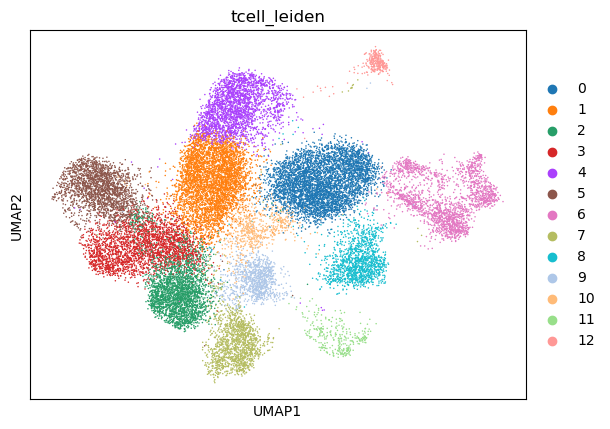

In [31]:
sc.pl.umap(adata_tcell, color="tcell_leiden")

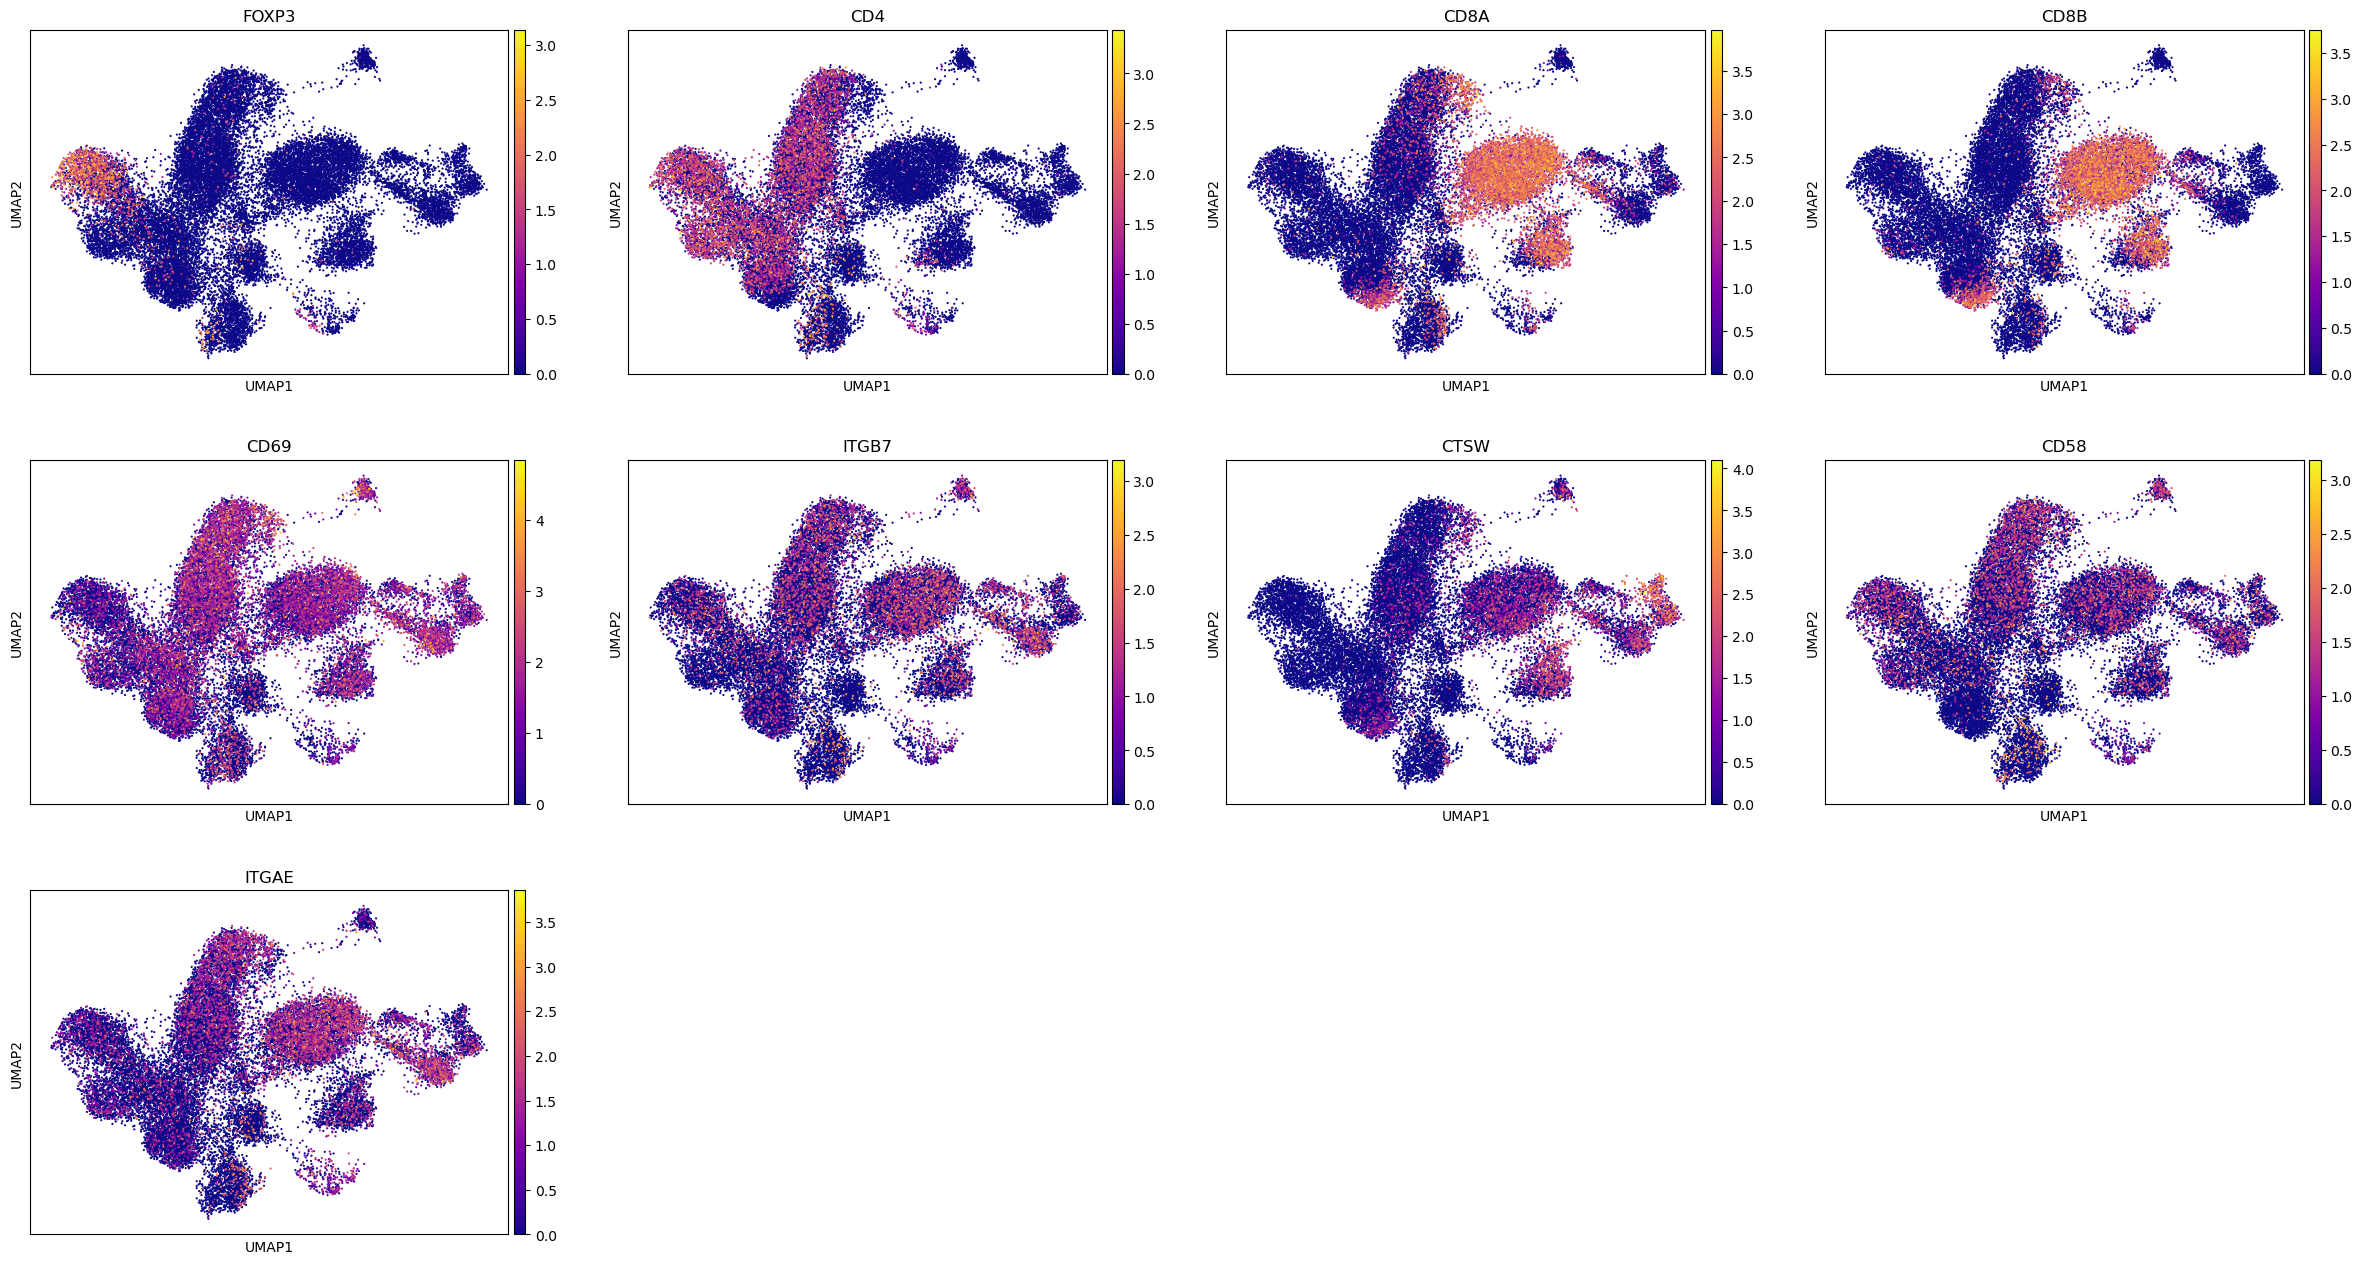

In [32]:
sc.pl.umap(
    adata_tcell,
    color=["FOXP3", "CD4", "CD8A", "CD8B", "CD69", "ITGB7", "CTSW", "CD58", "ITGAE"],
    color_map='plasma',
    size=10,
)

In [18]:
markers = {
    "CD4/CD8": [
        "CD4",
        "CD8A",
        "CD8B",
    ],
    "naive/mem": [
        "CCR7",
        "SELL",
        "CD44",
        "CD27",
        "FAS",
    ],
    "Trm": [
        "CD69",
        "ITGAE",
        "CRTAM",
        "S1PR1",
    ],
    "Treg": [
        "FOXP3",
        "CTLA4",
        "IL2RA",
    ],
    "other": [
        "CD19",
        "MS4A1",
    ],
    "dpIEL": [
        "CD58",
        "CTSW",
    ],
    "Epithelial": [
        "EPCAM",
    ],
    "Proliferation": [
        "MKI67",
    ],
}

/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


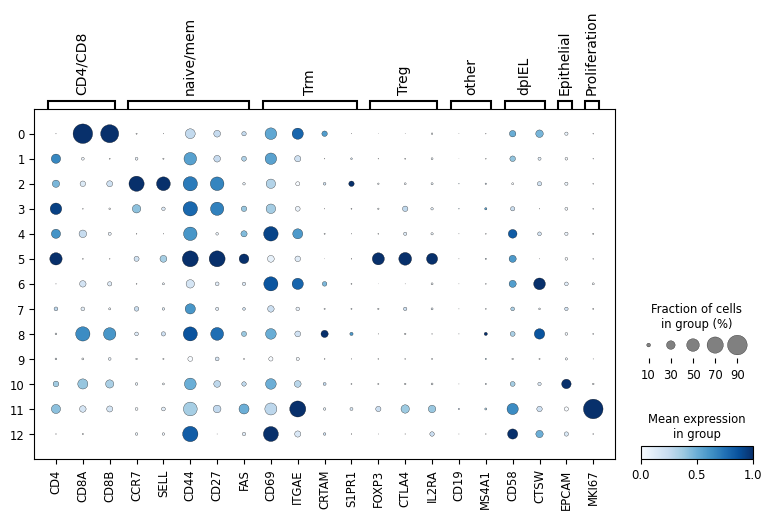

In [34]:
sc.pl.dotplot(
    adata_tcell,
    markers,
    groupby="tcell_leiden",
    standard_scale="var",
    cmap="Blues",
    dendrogram=False,
)

/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


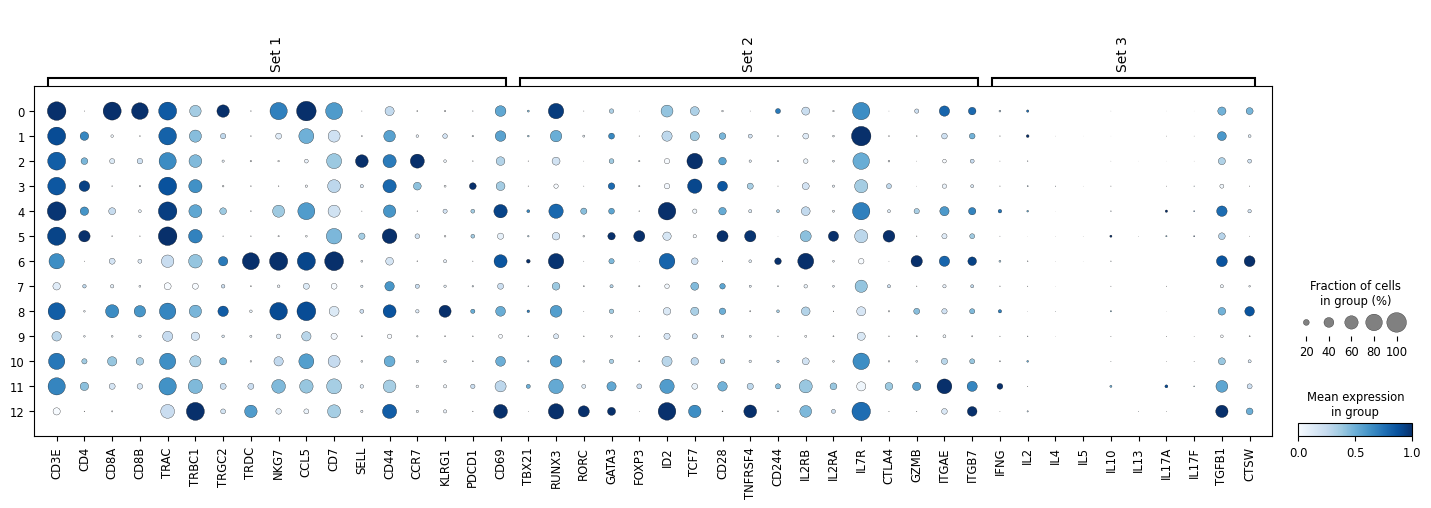

In [35]:
sc.pl.dotplot(
    adata_tcell,
    {
        "Set 1": [
            "CD3E",
            "CD4",
            "CD8A",
            "CD8B",
            "TRAC",
            "TRBC1",
            "TRGC2",
            "TRDC",
            "NKG7",
            "CCL5",
            "CD7",
            "SELL",
            "CD44",
            "CCR7",
            "KLRG1",
            "PDCD1",
            "CD69",
        ],
        "Set 2": [
            "TBX21",
            "RUNX3",
            "RORC",
            "GATA3",
            "FOXP3",
            "ID2",
            "TCF7",
            "CD28",
            "TNFRSF4",
            "CD244",
            "IL2RB",
            "IL2RA",
            "IL7R",
            "CTLA4",
            "GZMB",
            "ITGAE",
            "ITGB7",
        ],
        "Set 3": [
            "IFNG",
            "IL2",
            "IL4",
            "IL5",
            "IL10",
            "IL13",
            "IL17A",
            "IL17F",
            "TGFB1",
            "CTSW",
        ],
    },
    groupby="tcell_leiden",
    standard_scale="var",
    color_map="Blues",
)

/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


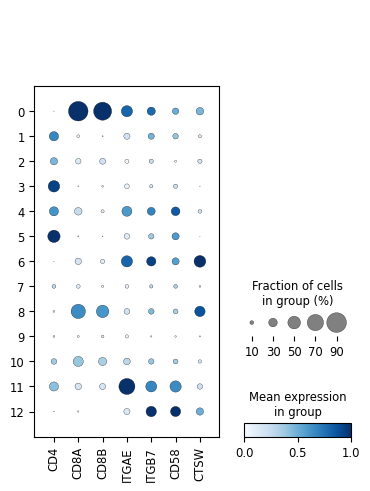

In [39]:
sc.pl.dotplot(
    adata_tcell,
    ["CD4", "CD8A", "CD8B","ITGAE", "ITGB7", "CD58", "CTSW"],
    groupby="tcell_leiden",
    standard_scale="var",
    color_map="Blues",
)

In [36]:
adata_tcell

AnnData object with n_obs × n_vars = 25389 × 1954
    obs: 'sanger_sample_id', 'disease_status', 'biopsy_type', 'age', 'sex', 'inflammation_status', 'smoking_status', 'bead_version', 'bead_lot', 'chip_version', 'chip_lot', 'lane', 'enzyme_lot_blp', 'gem_lot', 'f1_f2_ratio', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'normalization_factor', 'pct_counts_gene_group__mito_transcript', 'cell_passes_qc', 'scrublet__multiplet_scores', 'scrublet__predicted_multiplet', 'predicted_celltype_probability', 'major_cell_type', 'predicted_celltype', 'label__machine', 'category__machine', 'medication_class', 'disease_status__machine', 'leiden', 'harmony_leiden', 'tcell_leiden'
    var: 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'tcell_leiden_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'log1p_cp10k'
    obsp: 'distances', 'connectivities'

In [37]:
if adata_tcell.raw is not None:
    print("Raw counts are present in the AnnData object.")
else:
    print("Raw counts are not present in the AnnData object.")

Raw counts are present in the AnnData object.


In [38]:
#adata_tcell.write("/scratch/user/s4735100/tcell_harmony.h5ad")

In [1]:
import scanpy as sc
adata_tcell = sc.read_h5ad("/scratch/user/s4735100/tcell_harmony.h5ad")

/home/s4735100/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [2]:
if adata_tcell.raw is not None:
    print("Raw counts are present in the AnnData object.")
else:
    print("Raw counts are not present in the AnnData object.")

Raw counts are present in the AnnData object.


In [3]:
adata_tcell

AnnData object with n_obs × n_vars = 25389 × 1954
    obs: 'sanger_sample_id', 'disease_status', 'biopsy_type', 'age', 'sex', 'inflammation_status', 'smoking_status', 'bead_version', 'bead_lot', 'chip_version', 'chip_lot', 'lane', 'enzyme_lot_blp', 'gem_lot', 'f1_f2_ratio', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'normalization_factor', 'pct_counts_gene_group__mito_transcript', 'cell_passes_qc', 'scrublet__multiplet_scores', 'scrublet__predicted_multiplet', 'predicted_celltype_probability', 'major_cell_type', 'predicted_celltype', 'label__machine', 'category__machine', 'medication_class', 'disease_status__machine', 'leiden', 'harmony_leiden', 'tcell_leiden'
    var: 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'tcell_leiden_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'log1p_cp10k'
    obsp: 'connectivities', 'distances'

In [4]:
desired_clusters = ["1", "4"]
cluster_mask = adata_tcell.obs['tcell_leiden'].isin(desired_clusters)
adata_two_clusters = adata_tcell[cluster_mask, :]

In [5]:
adata_two_clusters

View of AnnData object with n_obs × n_vars = 6555 × 1954
    obs: 'sanger_sample_id', 'disease_status', 'biopsy_type', 'age', 'sex', 'inflammation_status', 'smoking_status', 'bead_version', 'bead_lot', 'chip_version', 'chip_lot', 'lane', 'enzyme_lot_blp', 'gem_lot', 'f1_f2_ratio', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'normalization_factor', 'pct_counts_gene_group__mito_transcript', 'cell_passes_qc', 'scrublet__multiplet_scores', 'scrublet__predicted_multiplet', 'predicted_celltype_probability', 'major_cell_type', 'predicted_celltype', 'label__machine', 'category__machine', 'medication_class', 'disease_status__machine', 'leiden', 'harmony_leiden', 'tcell_leiden'
    var: 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'tcell_leiden_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'log1p_cp10k'
    obsp: 'connectivities', 'distances'

In [6]:
raw_adata_two_clusters = adata_two_clusters.raw.to_adata()

/home/s4735100/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [7]:
raw_adata_two_clusters

AnnData object with n_obs × n_vars = 6555 × 33538
    obs: 'sanger_sample_id', 'disease_status', 'biopsy_type', 'age', 'sex', 'inflammation_status', 'smoking_status', 'bead_version', 'bead_lot', 'chip_version', 'chip_lot', 'lane', 'enzyme_lot_blp', 'gem_lot', 'f1_f2_ratio', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'normalization_factor', 'pct_counts_gene_group__mito_transcript', 'cell_passes_qc', 'scrublet__multiplet_scores', 'scrublet__predicted_multiplet', 'predicted_celltype_probability', 'major_cell_type', 'predicted_celltype', 'label__machine', 'category__machine', 'medication_class', 'disease_status__machine', 'leiden', 'harmony_leiden', 'tcell_leiden'
    var: 'gene_id'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'tcell_leiden_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    obsp: 'connectivities', 'distances'

In [8]:
sc.pp.highly_variable_genes(raw_adata_two_clusters, subset = True)

/home/s4735100/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [9]:
raw_adata_two_clusters

AnnData object with n_obs × n_vars = 6555 × 2007
    obs: 'sanger_sample_id', 'disease_status', 'biopsy_type', 'age', 'sex', 'inflammation_status', 'smoking_status', 'bead_version', 'bead_lot', 'chip_version', 'chip_lot', 'lane', 'enzyme_lot_blp', 'gem_lot', 'f1_f2_ratio', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'normalization_factor', 'pct_counts_gene_group__mito_transcript', 'cell_passes_qc', 'scrublet__multiplet_scores', 'scrublet__predicted_multiplet', 'predicted_celltype_probability', 'major_cell_type', 'predicted_celltype', 'label__machine', 'category__machine', 'medication_class', 'disease_status__machine', 'leiden', 'harmony_leiden', 'tcell_leiden'
    var: 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'tcell_leiden_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    obsp: 'connectivities', 'distances'

In [10]:
raw_adata_two_clusters = raw_adata_two_clusters[:, raw_adata_two_clusters.var.highly_variable]
sc.tl.pca(raw_adata_two_clusters)
sc.external.pp.harmony_integrate(
    raw_adata_two_clusters,
    key="sanger_sample_id",
    basis="X_pca",
    adjusted_basis="X_pca_harmony",
)
sc.pp.neighbors(raw_adata_two_clusters, use_rep="X_pca_harmony")
sc.tl.leiden(raw_adata_two_clusters, key_added = "two_clusters_leiden")
sc.tl.umap(raw_adata_two_clusters)

/home/s4735100/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
2024-04-26 15:13:31,982 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-04-26 15:13:33,642 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-04-26 15:13:33,658 - harmonypy - INFO - Iteration 1 of 10
2024-04-26 15:13:34,405 - harmonypy - INFO - Iteration 2 of 10
2024-04-26 15:13:35,156 - harmonypy - INFO - Iteration 3 of 10
2024-04-26 15:13:35,847 - harmonypy - INFO - Iteration 4 of 10
2024-04-26 15:13:36,320 - harmonypy - INFO - Iteration 5 of 10
2024-04-26 15:13:36,739 - harmonypy - INFO - Iteration 6 of 10
2024-04-26 15:13:37,109 - harmonypy - INFO - Iteration 7 of 10
2024-04-26 15:13:37,476 - harmonypy - INFO - Iteration 8 of 10
2024-04-26 15:13:37,846 - harmonypy - INFO - Iteration 9 of 10
2024-04-26 15:13:38,192 - harm

In [11]:
full_dimension_adata_two_clusters = adata_two_clusters.raw.to_adata()

/home/s4735100/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [12]:
full_dimension_adata_two_clusters.obs = raw_adata_two_clusters.obs
full_dimension_adata_two_clusters.obsm = raw_adata_two_clusters.obsm

In [13]:
full_dimension_adata_two_clusters

AnnData object with n_obs × n_vars = 6555 × 33538
    obs: 'sanger_sample_id', 'disease_status', 'biopsy_type', 'age', 'sex', 'inflammation_status', 'smoking_status', 'bead_version', 'bead_lot', 'chip_version', 'chip_lot', 'lane', 'enzyme_lot_blp', 'gem_lot', 'f1_f2_ratio', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'normalization_factor', 'pct_counts_gene_group__mito_transcript', 'cell_passes_qc', 'scrublet__multiplet_scores', 'scrublet__predicted_multiplet', 'predicted_celltype_probability', 'major_cell_type', 'predicted_celltype', 'label__machine', 'category__machine', 'medication_class', 'disease_status__machine', 'leiden', 'harmony_leiden', 'tcell_leiden', 'two_clusters_leiden'
    var: 'gene_id'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'tcell_leiden_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    obsp: 'connectivities', 'distances'

/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


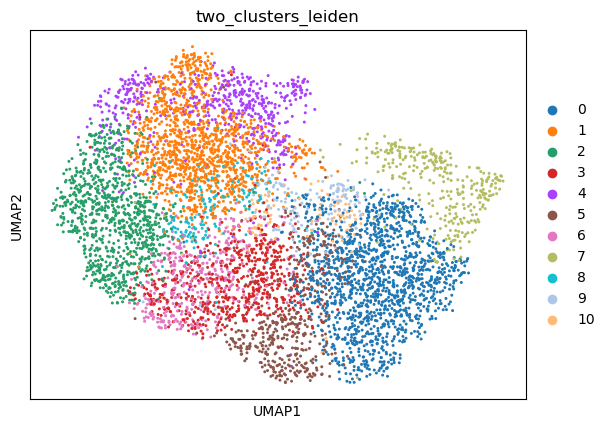

In [14]:
sc.pl.umap(full_dimension_adata_two_clusters, color="two_clusters_leiden")

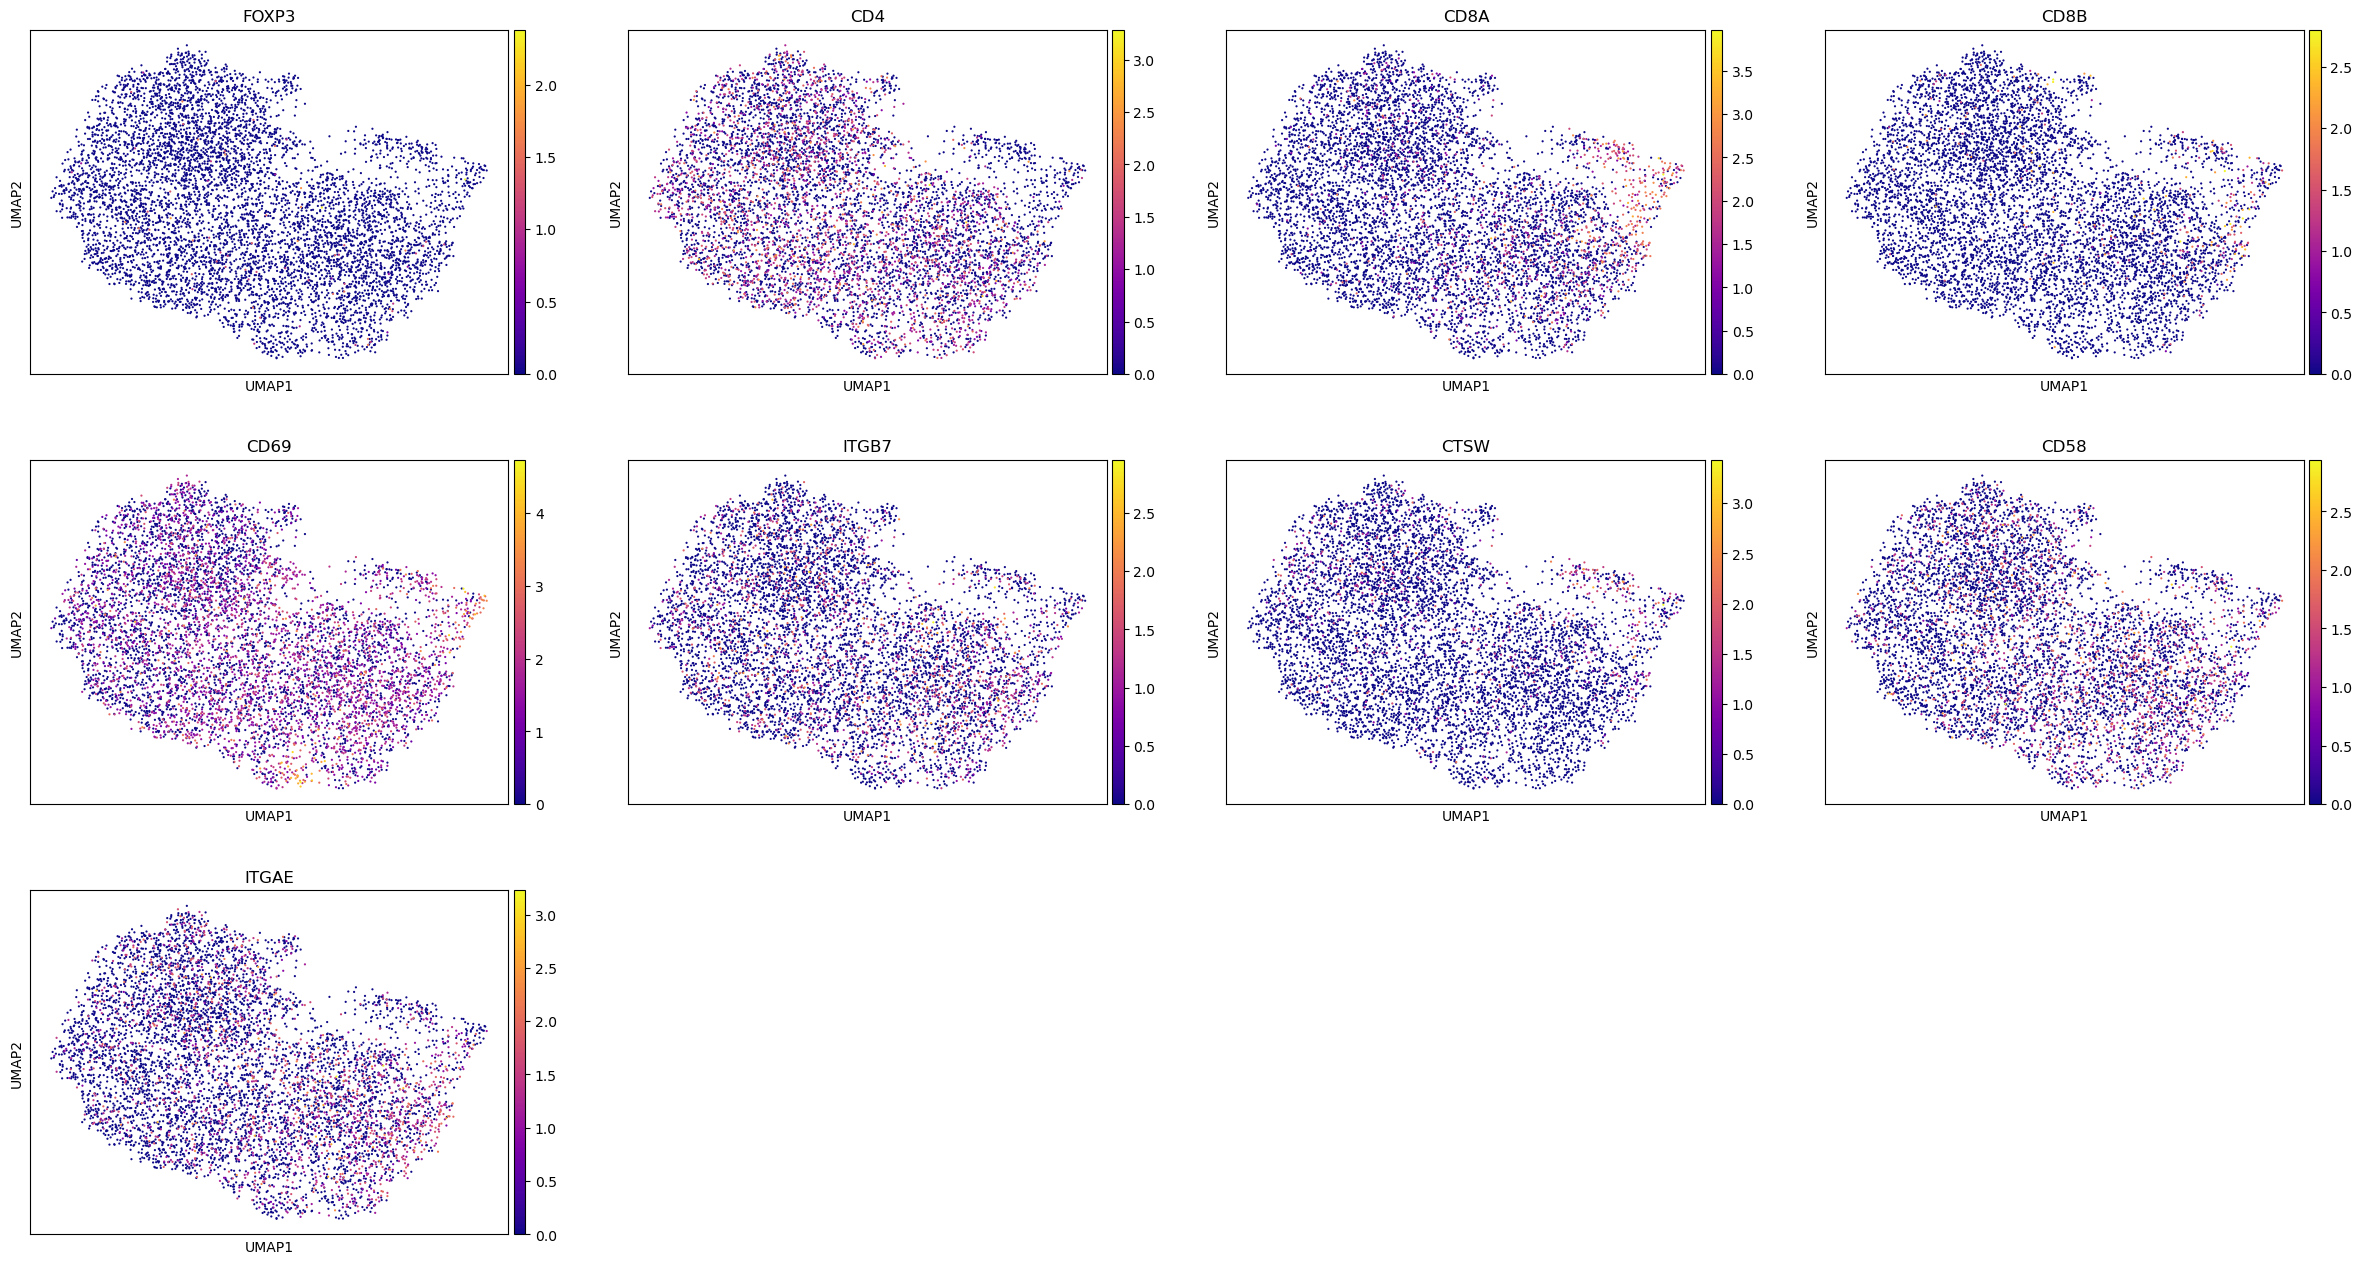

In [15]:
sc.pl.umap(
    full_dimension_adata_two_clusters,
    color=["FOXP3", "CD4", "CD8A", "CD8B", "CD69", "ITGB7", "CTSW", "CD58", "ITGAE"],
    color_map='plasma',
    size=10,
)

/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


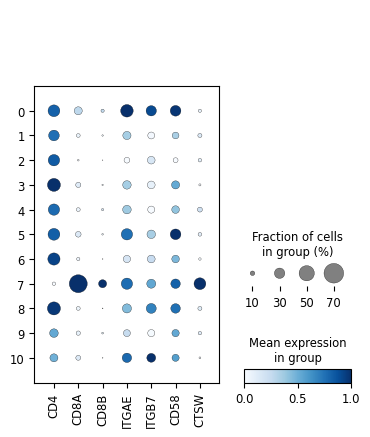

In [16]:
sc.pl.dotplot(
    full_dimension_adata_two_clusters,
    ["CD4", "CD8A", "CD8B","ITGAE", "ITGB7", "CD58", "CTSW"],
    groupby="two_clusters_leiden",
    standard_scale="var",
    color_map="Blues",
)

/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


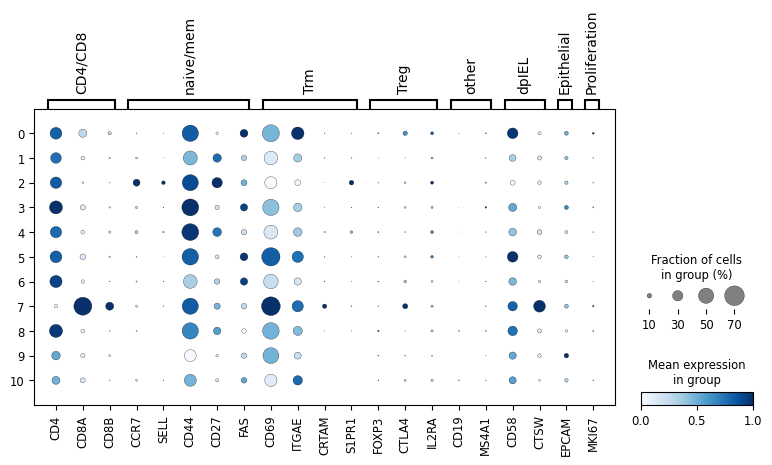

In [19]:
sc.pl.dotplot(
    full_dimension_adata_two_clusters,
    markers,
    groupby="two_clusters_leiden",
    standard_scale="var",
    cmap="Blues",
    dendrogram=False,
)

/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


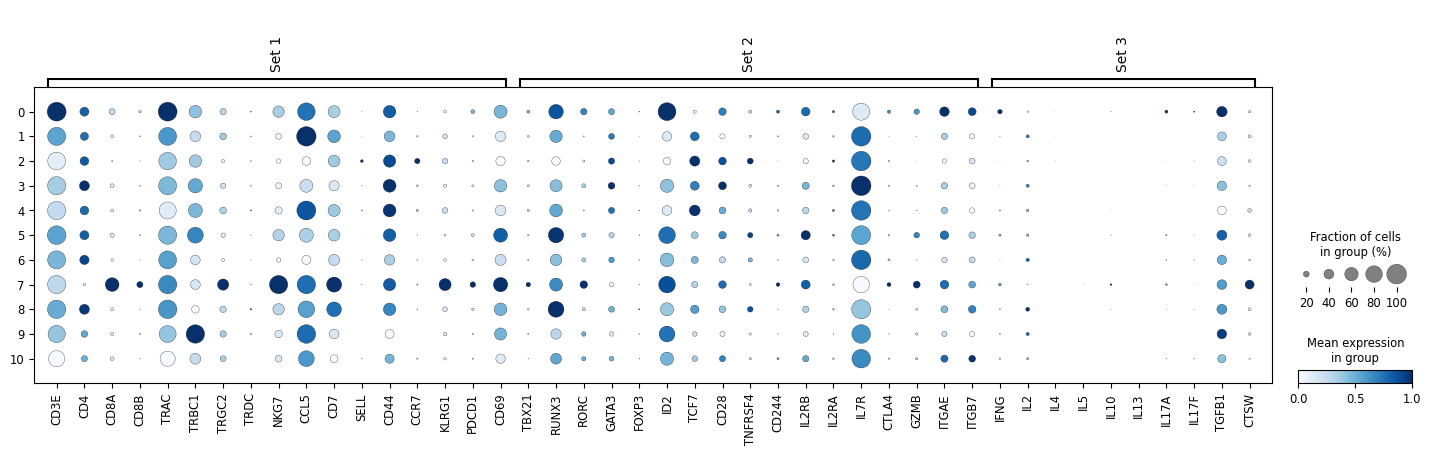

In [20]:
sc.pl.dotplot(
    full_dimension_adata_two_clusters,
    {
        "Set 1": [
            "CD3E",
            "CD4",
            "CD8A",
            "CD8B",
            "TRAC",
            "TRBC1",
            "TRGC2",
            "TRDC",
            "NKG7",
            "CCL5",
            "CD7",
            "SELL",
            "CD44",
            "CCR7",
            "KLRG1",
            "PDCD1",
            "CD69",
        ],
        "Set 2": [
            "TBX21",
            "RUNX3",
            "RORC",
            "GATA3",
            "FOXP3",
            "ID2",
            "TCF7",
            "CD28",
            "TNFRSF4",
            "CD244",
            "IL2RB",
            "IL2RA",
            "IL7R",
            "CTLA4",
            "GZMB",
            "ITGAE",
            "ITGB7",
        ],
        "Set 3": [
            "IFNG",
            "IL2",
            "IL4",
            "IL5",
            "IL10",
            "IL13",
            "IL17A",
            "IL17F",
            "TGFB1",
            "CTSW",
        ],
    },
    groupby="two_clusters_leiden",
    standard_scale="var",
    color_map="Blues",
)

In [31]:
full_dimension_adata_two_clusters.raw = full_dimension_adata_two_clusters

In [32]:
full_dimension_adata_two_clusters.raw.to_adata()

/home/s4735100/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 6555 × 33538
    obs: 'sanger_sample_id', 'disease_status', 'biopsy_type', 'age', 'sex', 'inflammation_status', 'smoking_status', 'bead_version', 'bead_lot', 'chip_version', 'chip_lot', 'lane', 'enzyme_lot_blp', 'gem_lot', 'f1_f2_ratio', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'normalization_factor', 'pct_counts_gene_group__mito_transcript', 'cell_passes_qc', 'scrublet__multiplet_scores', 'scrublet__predicted_multiplet', 'predicted_celltype_probability', 'major_cell_type', 'predicted_celltype', 'label__machine', 'category__machine', 'medication_class', 'disease_status__machine', 'leiden', 'harmony_leiden', 'tcell_leiden', 'two_clusters_leiden'
    var: 'gene_id'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'tcell_leiden_colors', 'umap', 'two_clusters_leiden_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    obsp: 'connectivities', 'distances'

In [33]:
full_dimension_adata_two_clusters.write("/scratch/user/s4735100/two_clusters_harmony.h5ad")

In [34]:
adata_two_clusters = sc.read("/scratch/user/s4735100/two_clusters_harmony.h5ad")

/home/s4735100/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [35]:
adata_two_clusters

AnnData object with n_obs × n_vars = 6555 × 33538
    obs: 'sanger_sample_id', 'disease_status', 'biopsy_type', 'age', 'sex', 'inflammation_status', 'smoking_status', 'bead_version', 'bead_lot', 'chip_version', 'chip_lot', 'lane', 'enzyme_lot_blp', 'gem_lot', 'f1_f2_ratio', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'normalization_factor', 'pct_counts_gene_group__mito_transcript', 'cell_passes_qc', 'scrublet__multiplet_scores', 'scrublet__predicted_multiplet', 'predicted_celltype_probability', 'major_cell_type', 'predicted_celltype', 'label__machine', 'category__machine', 'medication_class', 'disease_status__machine', 'leiden', 'harmony_leiden', 'tcell_leiden', 'two_clusters_leiden'
    var: 'gene_id'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'tcell_leiden_colors', 'two_clusters_leiden_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    obsp: 'connectivities', 'distances'

In [36]:
adata_two_clusters.raw.to_adata()

AnnData object with n_obs × n_vars = 6555 × 33538
    obs: 'sanger_sample_id', 'disease_status', 'biopsy_type', 'age', 'sex', 'inflammation_status', 'smoking_status', 'bead_version', 'bead_lot', 'chip_version', 'chip_lot', 'lane', 'enzyme_lot_blp', 'gem_lot', 'f1_f2_ratio', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'normalization_factor', 'pct_counts_gene_group__mito_transcript', 'cell_passes_qc', 'scrublet__multiplet_scores', 'scrublet__predicted_multiplet', 'predicted_celltype_probability', 'major_cell_type', 'predicted_celltype', 'label__machine', 'category__machine', 'medication_class', 'disease_status__machine', 'leiden', 'harmony_leiden', 'tcell_leiden', 'two_clusters_leiden'
    var: 'gene_id'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'tcell_leiden_colors', 'two_clusters_leiden_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    obsp: 'connectivities', 'distances'

In [37]:
desired_clusters = ["0"]
cluster_mask = adata_two_clusters.obs['two_clusters_leiden'].isin(desired_clusters)
adata_cluster_zero = adata_two_clusters[cluster_mask, :]

In [38]:
adata_cluster_zero

View of AnnData object with n_obs × n_vars = 1462 × 33538
    obs: 'sanger_sample_id', 'disease_status', 'biopsy_type', 'age', 'sex', 'inflammation_status', 'smoking_status', 'bead_version', 'bead_lot', 'chip_version', 'chip_lot', 'lane', 'enzyme_lot_blp', 'gem_lot', 'f1_f2_ratio', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'normalization_factor', 'pct_counts_gene_group__mito_transcript', 'cell_passes_qc', 'scrublet__multiplet_scores', 'scrublet__predicted_multiplet', 'predicted_celltype_probability', 'major_cell_type', 'predicted_celltype', 'label__machine', 'category__machine', 'medication_class', 'disease_status__machine', 'leiden', 'harmony_leiden', 'tcell_leiden', 'two_clusters_leiden'
    var: 'gene_id'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'tcell_leiden_colors', 'two_clusters_leiden_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    obsp: 'connectivities', 'distances'

In [42]:
adata_cluster_zero_processed = adata_cluster_zero.copy()

/home/s4735100/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [43]:
sc.pp.highly_variable_genes(adata_cluster_zero_processed, subset = True)

/home/s4735100/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [44]:
adata_cluster_zero_processed= adata_cluster_zero_processed[:, adata_cluster_zero_processed.var.highly_variable]
sc.tl.pca(adata_cluster_zero_processed)
sc.external.pp.harmony_integrate(
    adata_cluster_zero_processed,
    key="sanger_sample_id",
    basis="X_pca",
    adjusted_basis="X_pca_harmony",
)
sc.pp.neighbors(adata_cluster_zero_processed, use_rep="X_pca_harmony")
sc.tl.leiden(adata_cluster_zero_processed, key_added = "cluster_zero_leiden")
sc.tl.umap(adata_cluster_zero_processed)

/home/s4735100/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
2024-04-26 15:55:33,222 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-04-26 15:55:33,516 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-04-26 15:55:33,522 - harmonypy - INFO - Iteration 1 of 10
2024-04-26 15:55:33,630 - harmonypy - INFO - Iteration 2 of 10
2024-04-26 15:55:33,738 - harmonypy - INFO - Iteration 3 of 10
2024-04-26 15:55:33,800 - harmonypy - INFO - Iteration 4 of 10
2024-04-26 15:55:33,859 - harmonypy - INFO - Iteration 5 of 10
2024-04-26 15:55:33,912 - harmonypy - INFO - Iteration 6 of 10
2024-04-26 15:55:33,965 - harmonypy - INFO - Iteration 7 of 10
2024-04-26 15:55:34,016 - harmonypy - INFO - Iteration 8 of 10
2024-04-26 15:55:34,061 - harmonypy - INFO - Iteration 9 of 10
2024-04-26 15:55:34,110 - harm

In [45]:
adata_cluster_zero.obs = adata_cluster_zero_processed.obs
adata_cluster_zero.obsm = adata_cluster_zero_processed.obsm

/home/s4735100/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


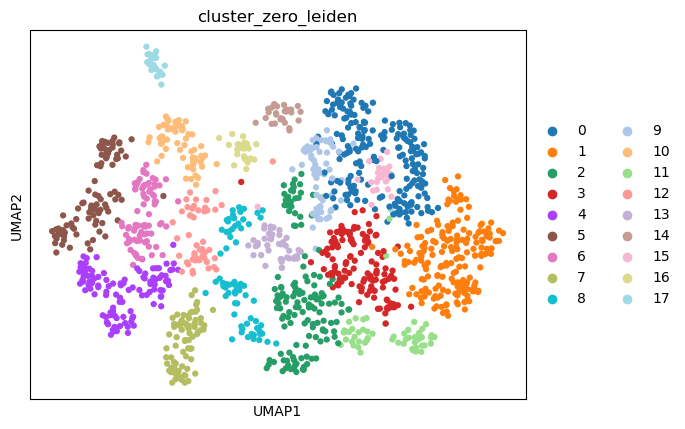

In [46]:
sc.pl.umap(adata_cluster_zero, color="cluster_zero_leiden")

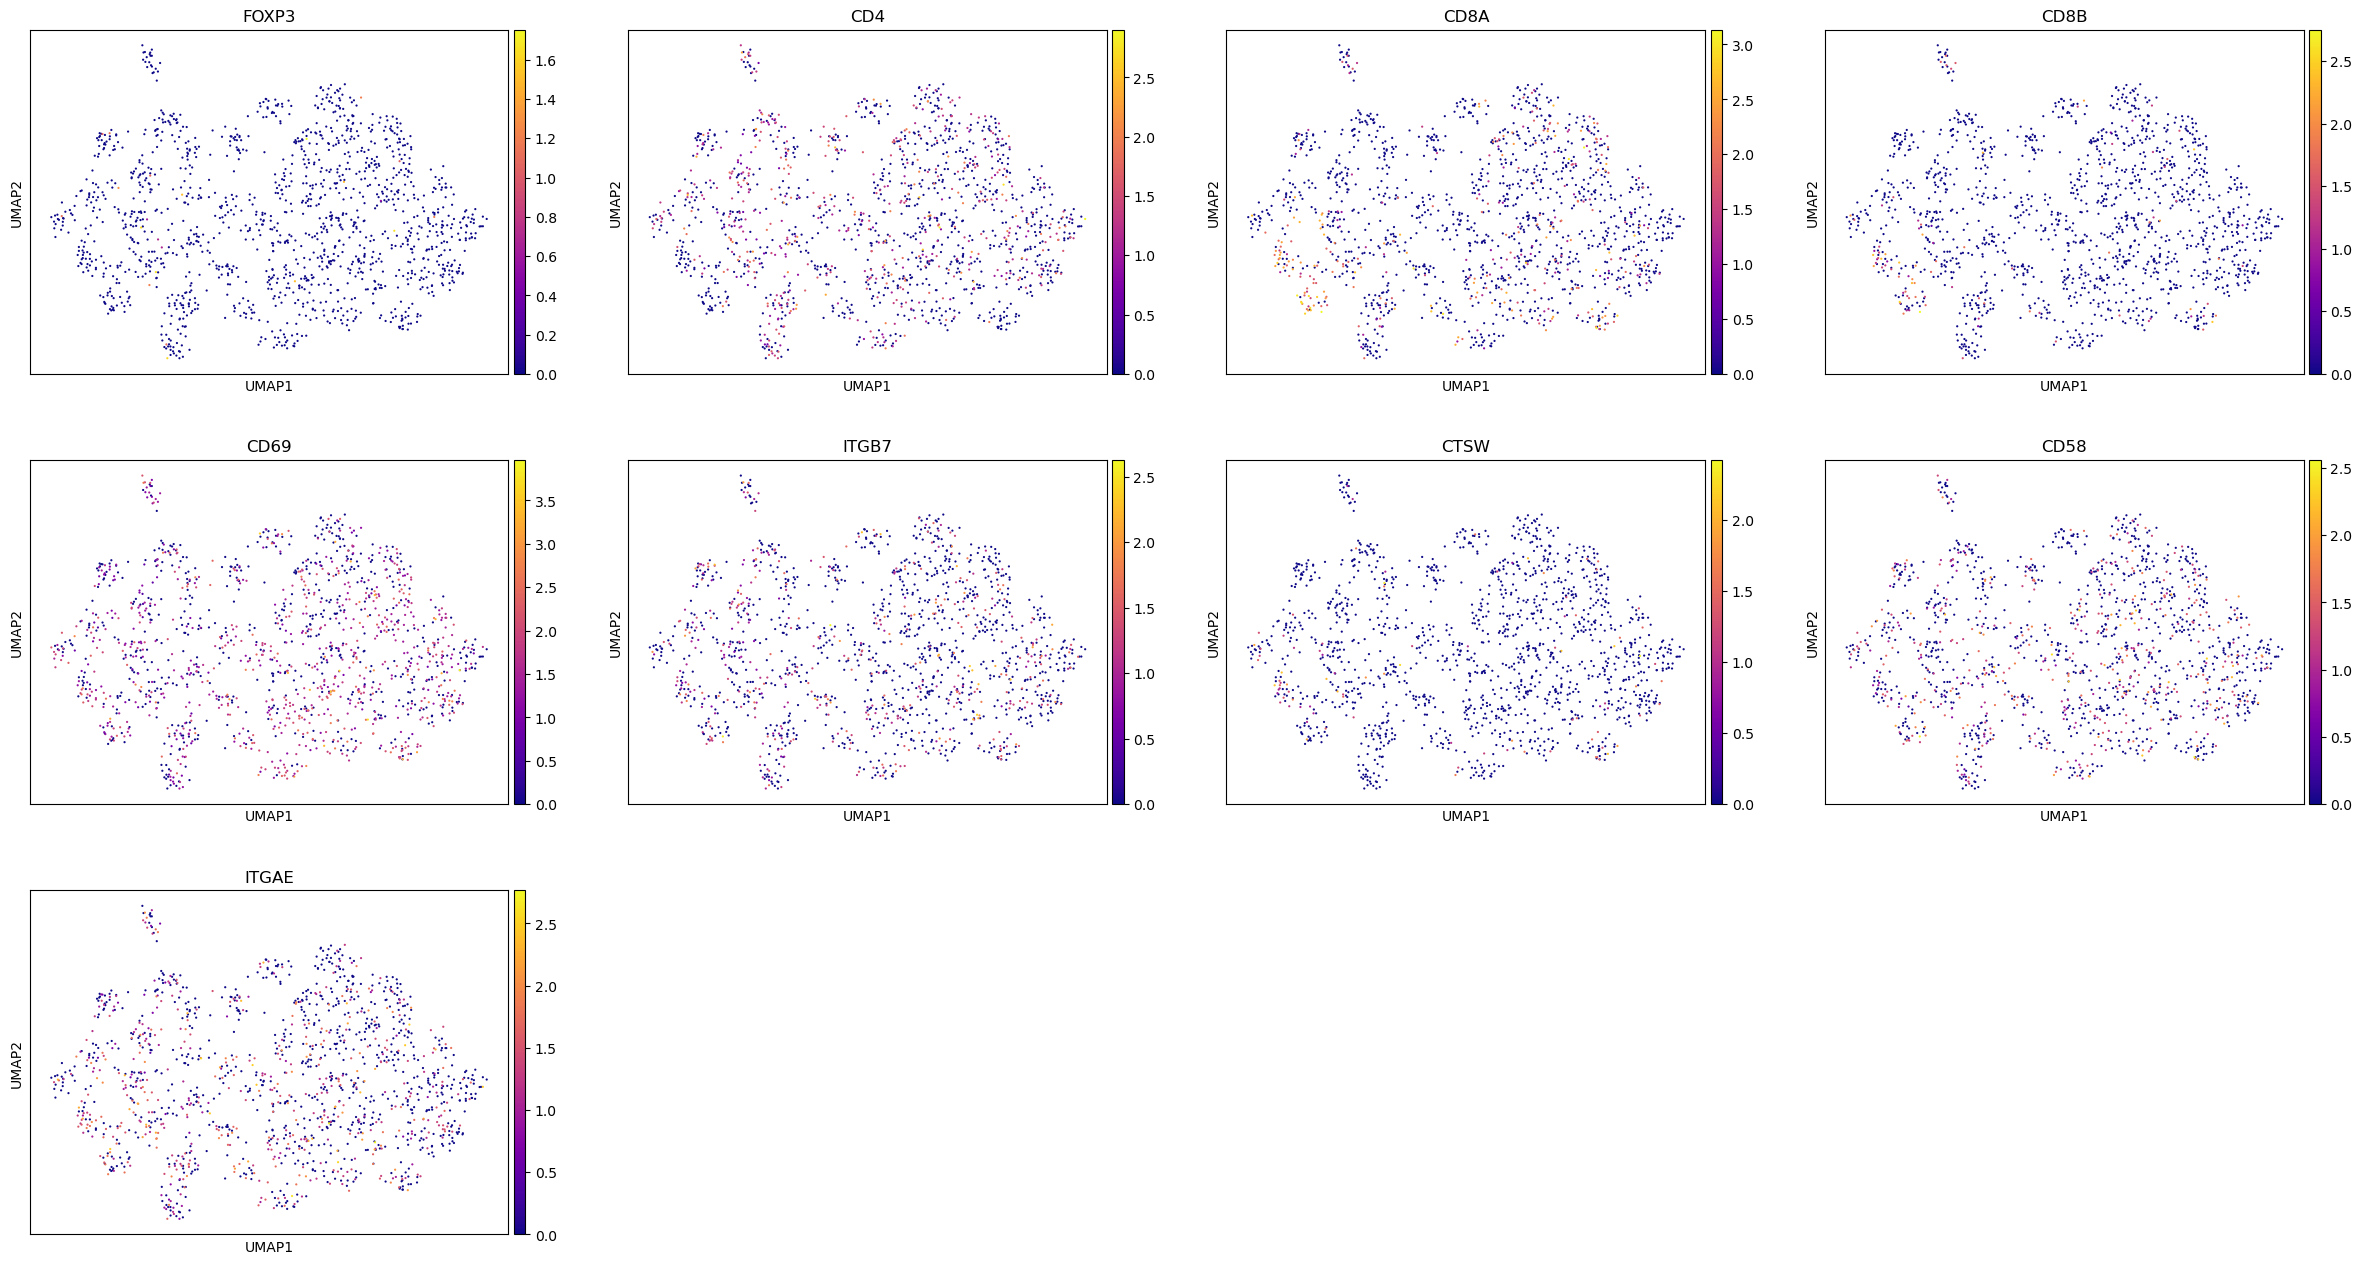

In [47]:
sc.pl.umap(
    adata_cluster_zero,
    color=["FOXP3", "CD4", "CD8A", "CD8B", "CD69", "ITGB7", "CTSW", "CD58", "ITGAE"],
    color_map='plasma',
    size=10,
)

/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


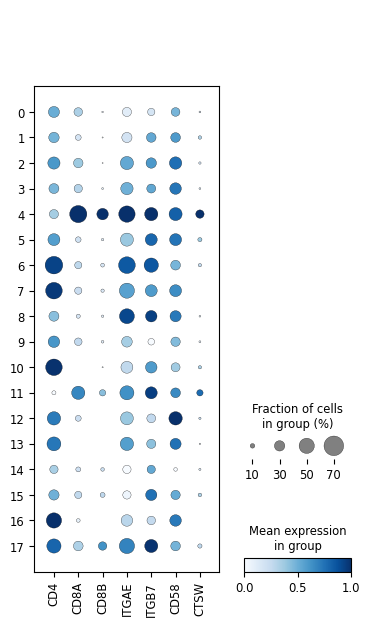

In [48]:
sc.pl.dotplot(
    adata_cluster_zero,
    ["CD4", "CD8A", "CD8B","ITGAE", "ITGB7", "CD58", "CTSW"],
    groupby="cluster_zero_leiden",
    standard_scale="var",
    color_map="Blues",
)

/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


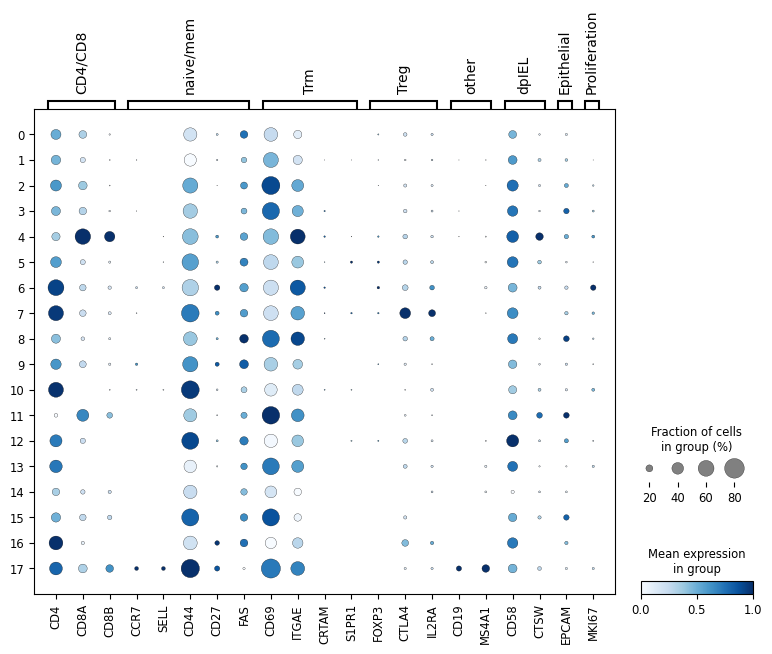

In [49]:
sc.pl.dotplot(
    adata_cluster_zero,
    markers,
    groupby="cluster_zero_leiden",
    standard_scale="var",
    cmap="Blues",
    dendrogram=False,
)

/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


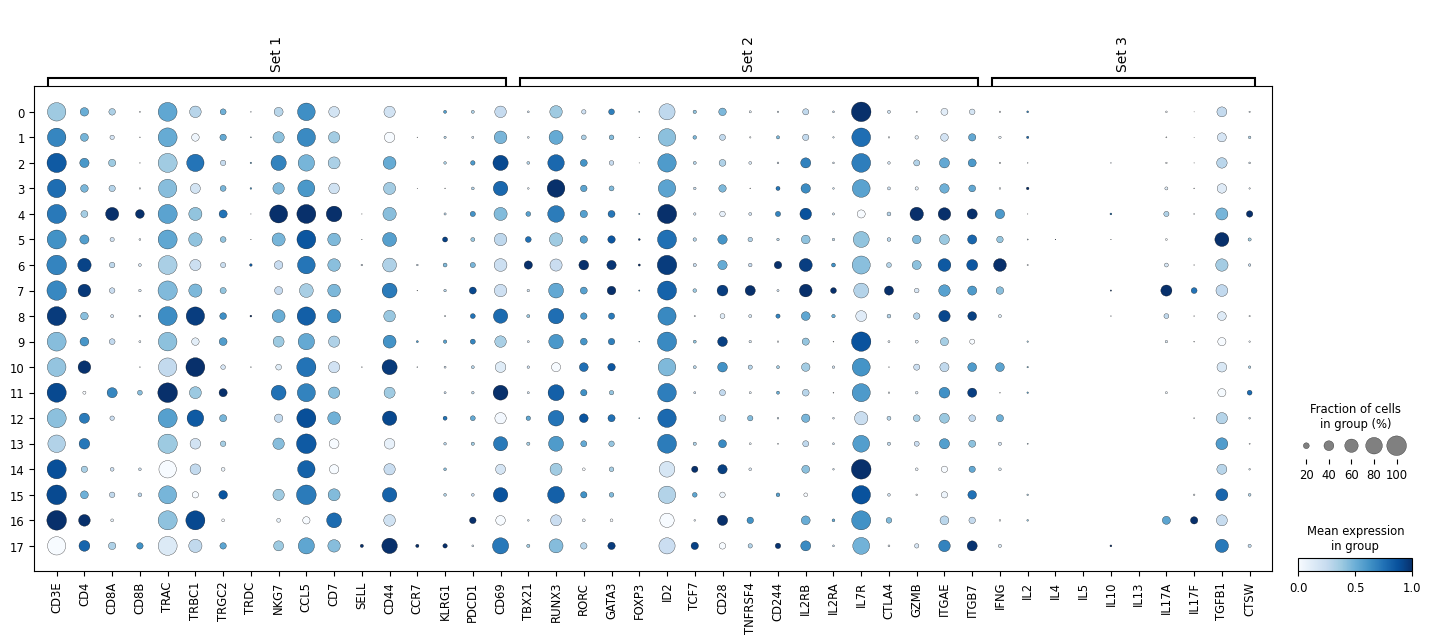

In [50]:
sc.pl.dotplot(
    adata_cluster_zero,
    {
        "Set 1": [
            "CD3E",
            "CD4",
            "CD8A",
            "CD8B",
            "TRAC",
            "TRBC1",
            "TRGC2",
            "TRDC",
            "NKG7",
            "CCL5",
            "CD7",
            "SELL",
            "CD44",
            "CCR7",
            "KLRG1",
            "PDCD1",
            "CD69",
        ],
        "Set 2": [
            "TBX21",
            "RUNX3",
            "RORC",
            "GATA3",
            "FOXP3",
            "ID2",
            "TCF7",
            "CD28",
            "TNFRSF4",
            "CD244",
            "IL2RB",
            "IL2RA",
            "IL7R",
            "CTLA4",
            "GZMB",
            "ITGAE",
            "ITGB7",
        ],
        "Set 3": [
            "IFNG",
            "IL2",
            "IL4",
            "IL5",
            "IL10",
            "IL13",
            "IL17A",
            "IL17F",
            "TGFB1",
            "CTSW",
        ],
    },
    groupby="cluster_zero_leiden",
    standard_scale="var",
    color_map="Blues",
)

In [51]:
adata_cluster_zero.raw.to_adata()

/home/s4735100/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 1462 × 33538
    obs: 'sanger_sample_id', 'disease_status', 'biopsy_type', 'age', 'sex', 'inflammation_status', 'smoking_status', 'bead_version', 'bead_lot', 'chip_version', 'chip_lot', 'lane', 'enzyme_lot_blp', 'gem_lot', 'f1_f2_ratio', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'normalization_factor', 'pct_counts_gene_group__mito_transcript', 'cell_passes_qc', 'scrublet__multiplet_scores', 'scrublet__predicted_multiplet', 'predicted_celltype_probability', 'major_cell_type', 'predicted_celltype', 'label__machine', 'category__machine', 'medication_class', 'disease_status__machine', 'leiden', 'harmony_leiden', 'tcell_leiden', 'two_clusters_leiden', 'cluster_zero_leiden'
    var: 'gene_id'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'tcell_leiden_colors', 'two_clusters_leiden_colors', 'umap', 'cluster_zero_leiden_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    obsp: 'connectivities', 'distances'

In [52]:
adata_cluster_zero.write("/scratch/user/s4735100/cluster_zero_harmony.h5ad")